1 – Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)


Load Dataset

In [2]:
housing = fetch_california_housing(as_frame=True)
df = housing.frame

df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Dataset provided by scikit-learn, commonly used for benchmarking regression models in real-estate pricing problems.

Dataset Overview

In [3]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Median Income → strongest economic signal

Location (Lat/Long) → pricing geography

Room & population features → housing density

Target Variable Distribution

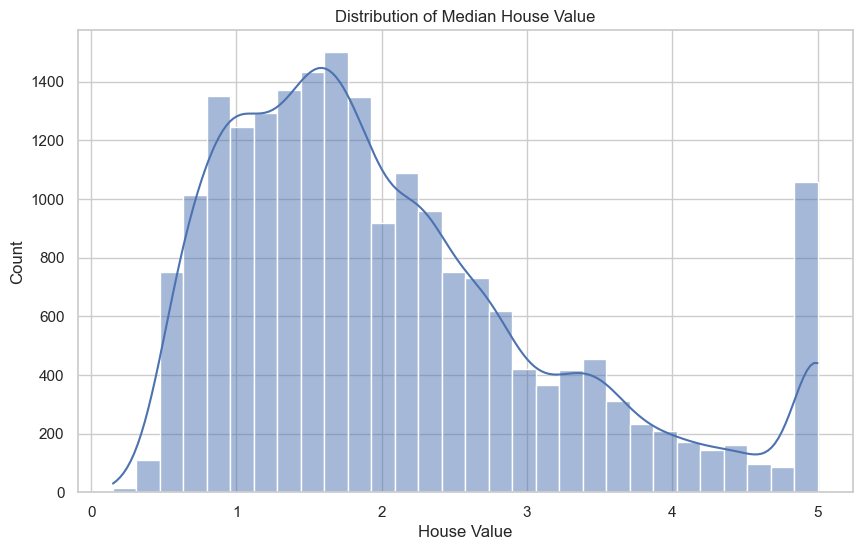

In [4]:
sns.histplot(df['MedHouseVal'], bins=30, kde=True)
plt.title("Distribution of Median House Value")
plt.xlabel("House Value")
plt.show()


Correlation Analysis

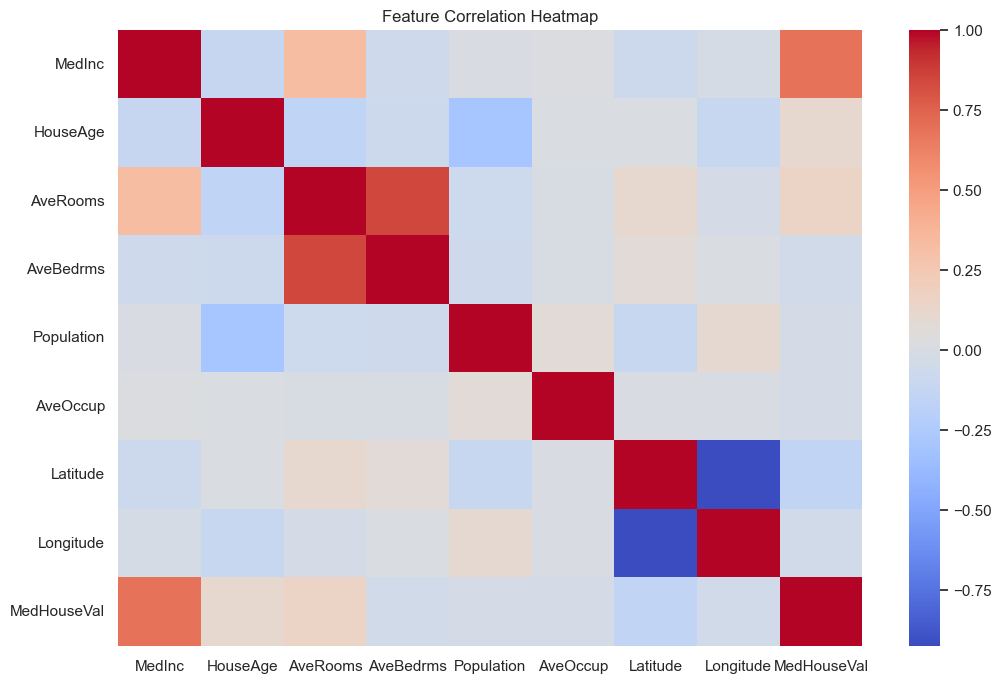

In [5]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


Feature Engineering

In [6]:
df['RoomsPerHousehold'] = df['AveRooms'] / df['AveOccup']
df['BedroomsRatio'] = df['AveBedrms'] / df['AveRooms']
df['PopulationPerHousehold'] = df['Population'] / df['AveOccup']

# Income categories
df['IncomeCategory'] = pd.cut(
    df['MedInc'],
    bins=[0, 2, 4, 6, np.inf],
    labels=['Low', 'Medium', 'High', 'Very High']
)


7 – Encode Income Category

In [7]:
df = pd.get_dummies(df, columns=['IncomeCategory'], drop_first=True)


8 – Visual Business Insights

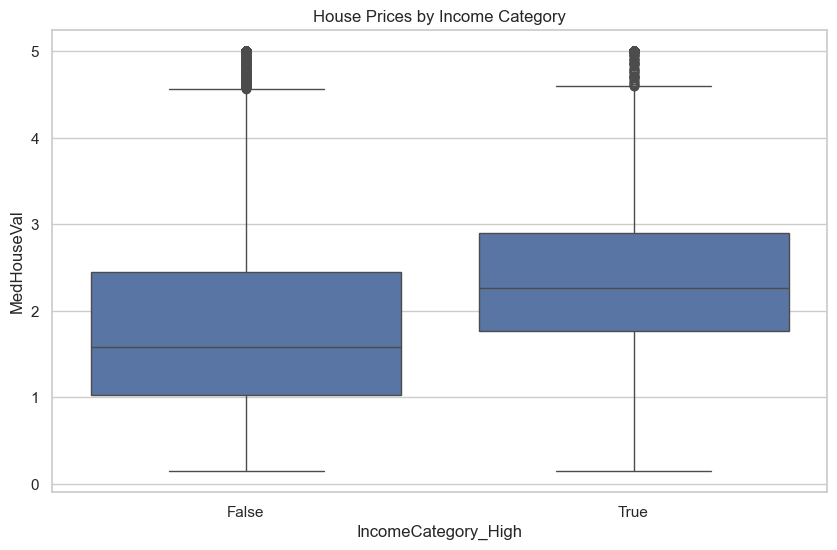

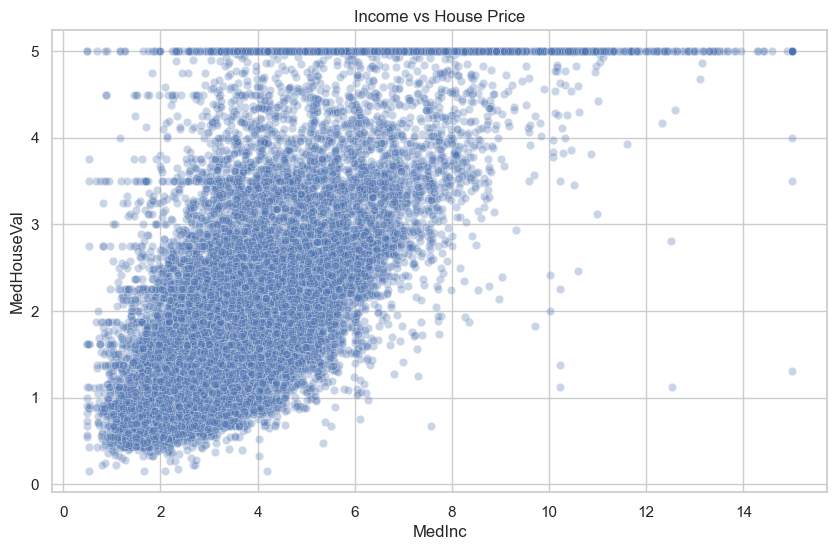

In [8]:
sns.boxplot(x='IncomeCategory_High', y='MedHouseVal', data=df)
plt.title("House Prices by Income Category")
plt.show()

sns.scatterplot(x='MedInc', y='MedHouseVal', data=df, alpha=0.3)
plt.title("Income vs House Price")
plt.show()


9 – Save Processed Dataset

In [10]:
df.to_csv("data/california_housing_processed.csv", index=False)
